# Project Goal: Forecasting gold price for next 30 days

# - Business Objective:

Understand the underlying structure in your dataset and come up with a suitable forecasting model which can effectively forecast gold prices for next 30 days

# 1. Import Necessary Libraries

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

# 2. Importing Data

In [10]:
Gold_Price = pd.read_csv('Gold_data.csv')
Gold_Price

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


# Exploratory Data Analysis(EDA)

# 3. Data Understanding

In [11]:
Gold_Price.shape # Rows & columns

(2182, 2)

In [12]:
Gold_Price.info

<bound method DataFrame.info of             date    price
0     2016-01-01  2252.60
1     2016-01-02  2454.50
2     2016-01-03  2708.10
3     2016-01-04  2577.80
4     2016-01-05  2597.75
...          ...      ...
2177  2021-12-17  4394.40
2178  2021-12-18  4389.50
2179  2021-12-19  4389.50
2180  2021-12-20  4354.10
2181  2021-12-21  4346.50

[2182 rows x 2 columns]>

In [13]:
Gold_Price.dtypes # Looking for data types

date      object
price    float64
dtype: object

### Date is objective type data

In [14]:
Gold_Price.isna().sum() # Looking for NAN values

date     0
price    0
dtype: int64

### There is no null values in the data set

In [15]:
Gold_Price.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [16]:
Gold_Price.describe(include='all')

,date,price
count,2182,2182.000000
unique,2182,NaN
top,2016-01-01,NaN
freq,1,NaN
mean,NaN,3284.450046
std,NaN,719.564434
min,NaN,2252.600000
25%,NaN,2697.020000
50%,NaN,2879.800000
75%,NaN,4147.325000


In [17]:
Gold_Price.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [18]:
Gold_Price.tail()

,date,price
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1
2181,2021-12-21,4346.5


In [19]:
Gold_Price['date'].nunique() # Looking for unique values

2182

In [20]:
Gold_Price['price'].nunique() # Looking for unique values

1876

In [21]:
Gold_Price.value_counts()

date        price 
2016-01-01  2252.6    1
2019-12-28  3464.2    1
2019-12-22  3375.1    1
2019-12-23  3398.0    1
2019-12-24  3431.0    1
                     ..
2017-12-22  2598.7    1
2017-12-21  2599.0    1
2017-12-20  2597.1    1
2017-12-19  2591.5    1
2021-12-21  4346.5    1
Length: 2182, dtype: int64

In [22]:
Gold_Price

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


# 4. Data Preparation

#### 1.Since date columnn is objective type data need to change it to type date time

In [23]:
Gold_Price['date'] = pd.to_datetime(Gold_Price['date'])
Gold_Price

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [24]:
Gold_Price.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [25]:
Gold_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


#### 2. Chaining  index to the data in order to make it proper time series data

In [26]:
Gold_Price_New = pd.read_csv('Gold_data.csv', header=0, index_col=0,squeeze=True,parse_dates=True)
Gold_Price_New 

date
2016-01-01    2252.60
2016-01-02    2454.50
2016-01-03    2708.10
2016-01-04    2577.80
2016-01-05    2597.75
               ...   
2021-12-17    4394.40
2021-12-18    4389.50
2021-12-19    4389.50
2021-12-20    4354.10
2021-12-21    4346.50
Name: price, Length: 2182, dtype: float64

In [27]:
Gold_Price_New.shape

(2182,)

#### 3. Cleaning and Handling the missing values & Outliers

In [28]:
Gold_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


#### Insight: No missing values present in the dataset

#### 4. Box plot for checking outliers present in my dataset

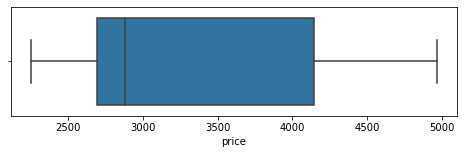

In [29]:
plt.figure(figsize=(8,2))
ax = sns.boxplot(x = Gold_Price['price'], whis=1.5)

#### Insight: There are no outliers present in my dataset

# Visualization of data distribution

#### 1. Histogram

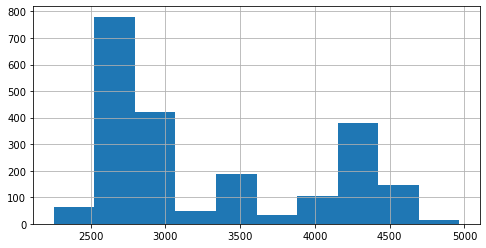

In [30]:
plt.figure(figsize=(8,4))
Gold_Price_New.hist()
plt.show()

#### 2. Plot

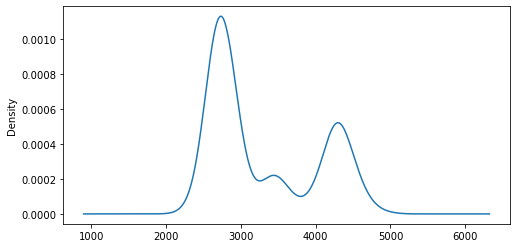

In [31]:
plt.figure(figsize=(8,4))
Gold_Price_New.plot(kind='kde')
plt.show()

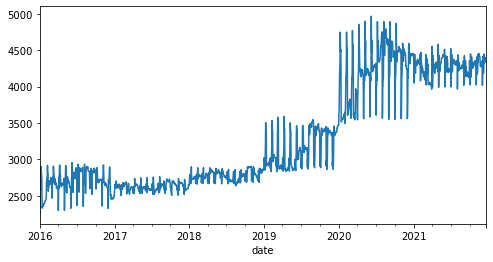

In [32]:
plt.figure(figsize=(8,4))
Gold_Price_New.plot()
plt.show()

#### Insight: Trend is upword or positive

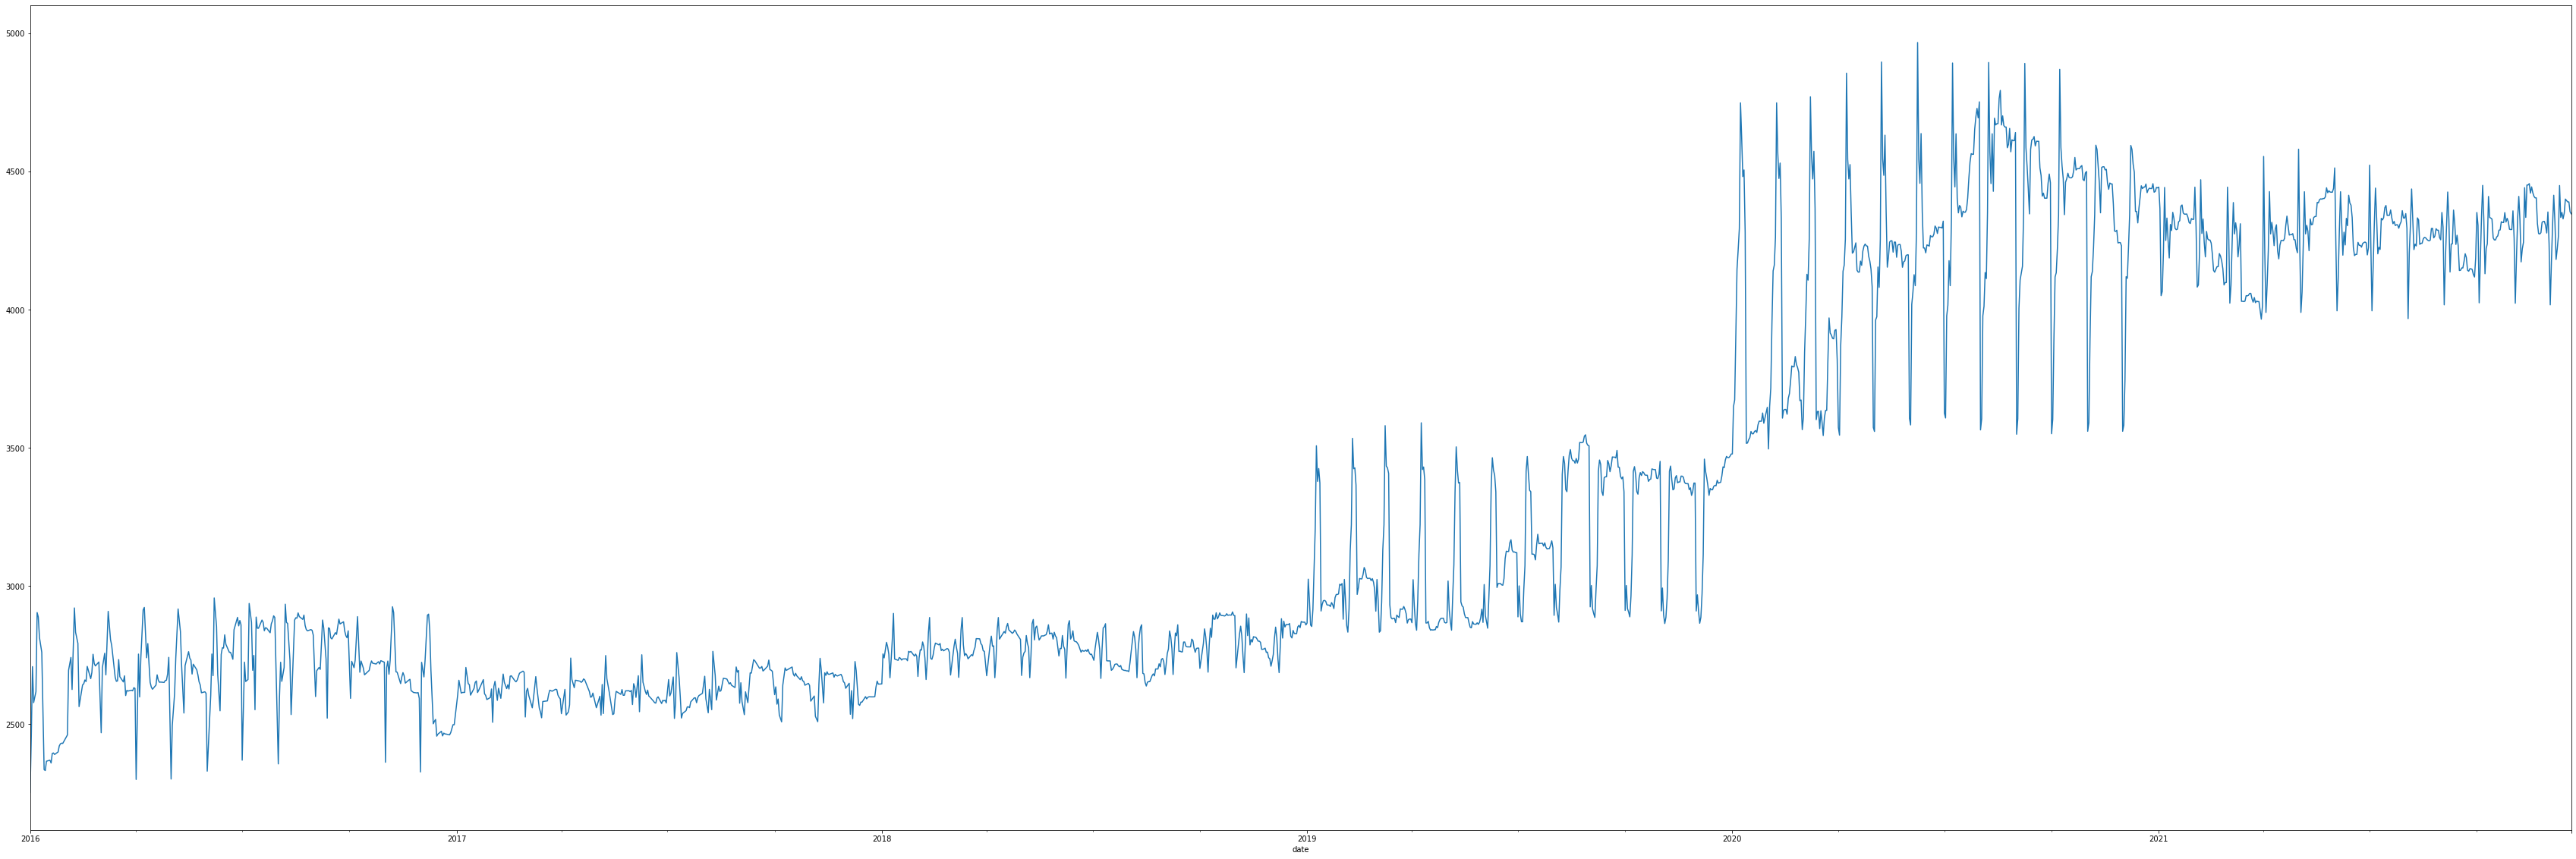

In [33]:
plt.figure(figsize=(60,20))
Gold_Price_New.plot()
plt.show()

#### Insight: Seasonality can be observed little bit

In [34]:
import warnings
warnings.filterwarnings('ignore')

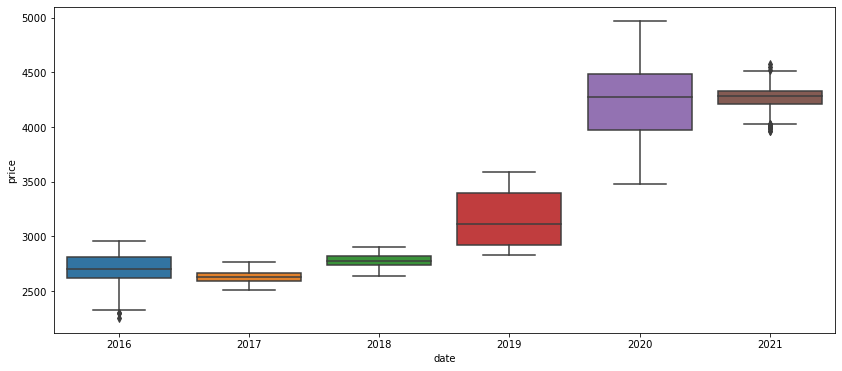

In [35]:
fig, ax = plt.subplots(figsize=(14,6))
sns.boxplot(Gold_Price_New.index.year, Gold_Price_New, ax=ax)
plt.show()

#### Insight: The growth in the price has much more of an exponential growth

# Correlation between variables & Visualizing in heat map

#### - Since our data is univarient we cannot compare between two variables,  So we neeed to look into the Lag plot which is nothing but the plotting of value against its lagged value

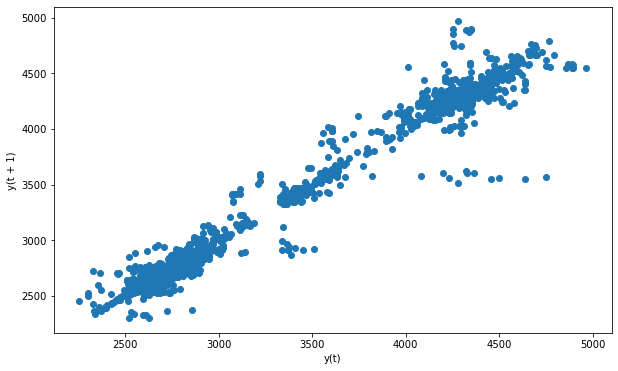

In [36]:
plt.figure(figsize=(10,6))
lag_plot(Gold_Price_New, lag=1)
plt.show()

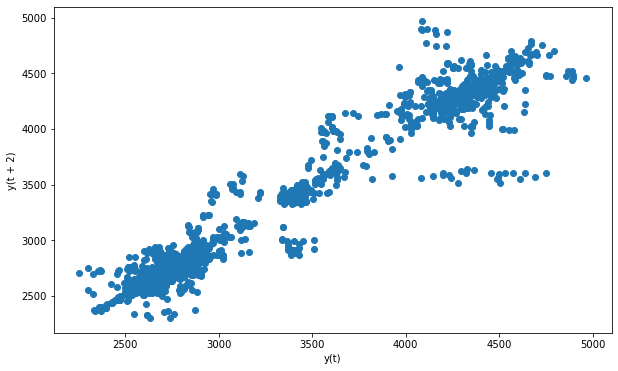

In [37]:
plt.figure(figsize=(10,6))
lag_plot(Gold_Price_New, lag=2)
plt.show()

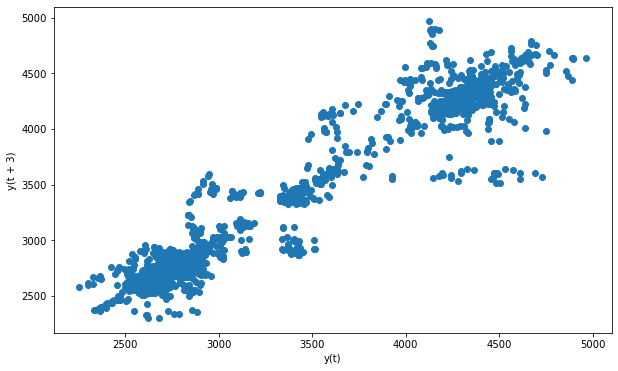

In [38]:
plt.figure(figsize=(10,6))
lag_plot(Gold_Price_New, lag=3)
plt.show()

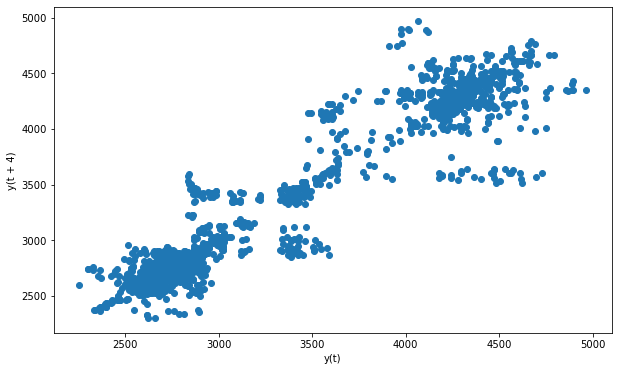

In [39]:
plt.figure(figsize=(10,6))
lag_plot(Gold_Price_New, lag=4)
plt.show()

#### Insight: From lag_1,2,3 & 4 suggest the positive correlation

### Creating autocorrelation plot

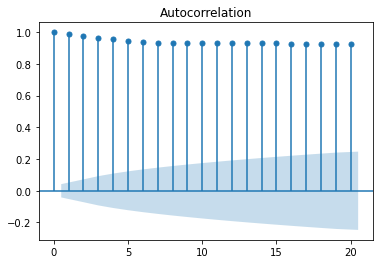

In [40]:
plot_acf(Gold_Price_New, lags=20)
plt.show()

#### Insight : Autocorrelation plot suggest that immediate lags have significate relationship to build a good forecating model

#### To seee the heat map we need to process the data a little bit

In [41]:
Gold_Price['price']=round(Gold_Price['price'])
Gold_Price['Year']=Gold_Price['date'].dt.year
Gold_Price['Month_of_Year']=Gold_Price['date'].dt.month

#### Lets see Heat map visualization of the data on monthly of each year

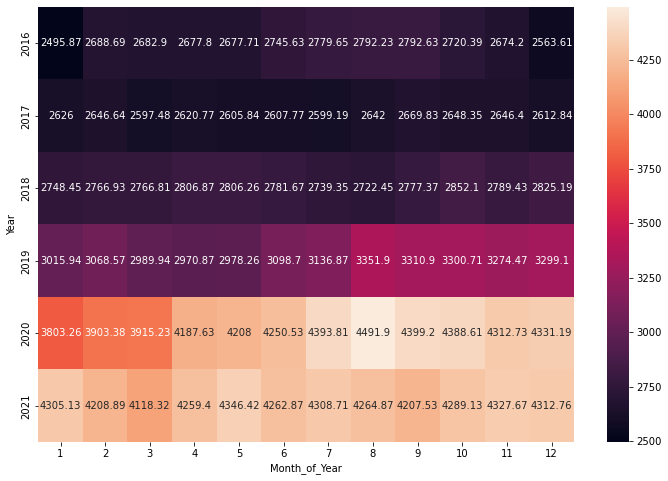

In [42]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Gold_Price,values="price",index="Year",columns="Month_of_Year",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
plt.show()

### Boxplot for all the month throughout all the years

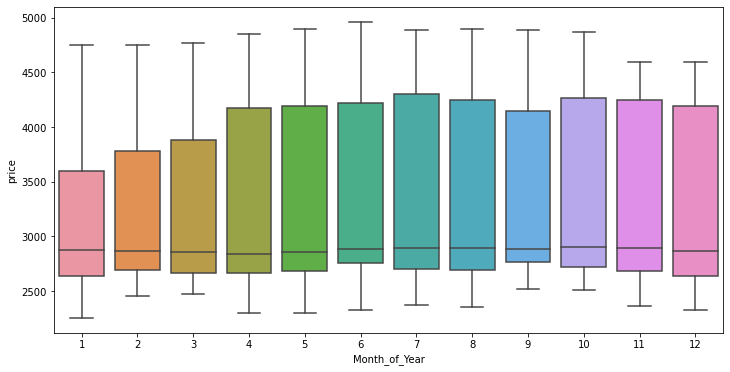

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Month_of_Year', y='price',data=Gold_Price)
plt.show()

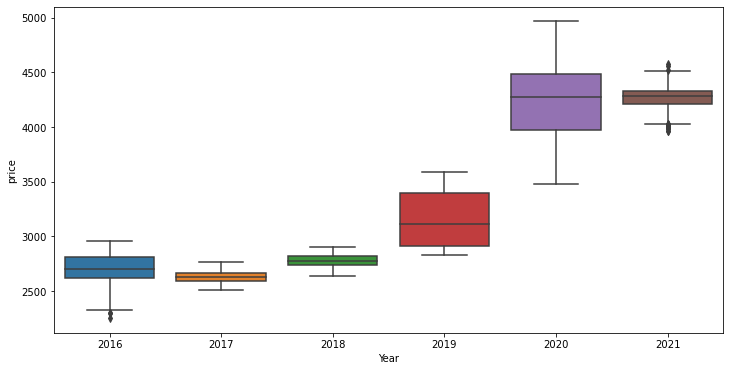

In [44]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Year', y='price',data=Gold_Price)
plt.show()

## Time series decomposition plot
- To find the clear trend
- To find the seasonality(Additive/Multiplicative)

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

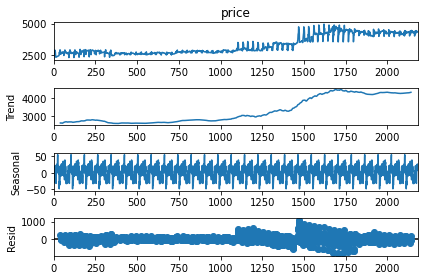

In [46]:
decompose_ts_add = seasonal_decompose(Gold_Price['price'], period=80 )
decompose_ts_add.plot()
plt.show()

In [47]:
Gold_Price["date"]= pd.to_datetime(Gold_Price["date"])
indexdata=Gold_Price.set_index(["date"])

In [48]:
from datetime import datetime

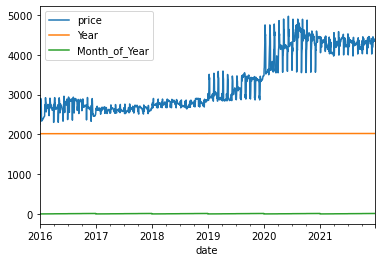

In [49]:
indexdata.plot()
plt.show()

In [50]:
resample = indexdata.resample('M') #M for monthly basis
quarterly_mean_sales = resample.mean()
quarterly_mean_sales

,price,Year,Month_of_Year
date,,,
2016-01-31,2495.870968,2016.0,1.0
2016-02-29,2688.689655,2016.0,2.0
2016-03-31,2682.903226,2016.0,3.0
2016-04-30,2677.800000,2016.0,4.0
2016-05-31,2677.709677,2016.0,5.0
...,...,...,...
2021-08-31,4264.870968,2021.0,8.0
2021-09-30,4207.533333,2021.0,9.0
2021-10-31,4289.129032,2021.0,10.0


In [51]:
quarterly_mean_sales.head(20)

,price,Year,Month_of_Year
date,,,
2016-01-31,2495.870968,2016.0,1.0
2016-02-29,2688.689655,2016.0,2.0
2016-03-31,2682.903226,2016.0,3.0
2016-04-30,2677.800000,2016.0,4.0
2016-05-31,2677.709677,2016.0,5.0
2016-06-30,2745.633333,2016.0,6.0
2016-07-31,2779.645161,2016.0,7.0
2016-08-31,2792.225806,2016.0,8.0
2016-09-30,2792.633333,2016.0,9.0


In [52]:
from pandas import Grouper
from pandas import DataFrame

In [53]:
from pandas.plotting import lag_plot

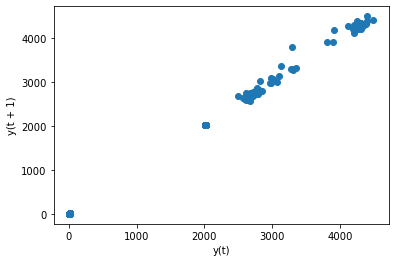

In [54]:
lag_plot(quarterly_mean_sales)
plt.show()

# Checking for stationality

### Dickey fuller test

In [55]:
from statsmodels.tsa.stattools import adfuller

In [56]:
test_result=adfuller(quarterly_mean_sales['price'])

In [57]:
def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [58]:
adfuller_test(quarterly_mean_sales['price'])

ADF Test Statistic : -0.18173231421114744
p-value : 0.9406643356884156
#Lags Used : 0
Number of Observations Used : 71
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Differencing

In [59]:
quarterly_mean_sales['price'] = quarterly_mean_sales['price'] - quarterly_mean_sales['price'].shift(1)

In [60]:
quarterly_mean_sales['price'].shift(1)

date
2016-01-31           NaN
2016-02-29           NaN
2016-03-31    192.818687
2016-04-30     -5.786429
2016-05-31     -5.103226
                 ...    
2021-08-31     45.843011
2021-09-30    -43.838710
2021-10-31    -57.337634
2021-11-30     81.595699
2021-12-31     38.537634
Freq: M, Name: price, Length: 72, dtype: float64

In [61]:
quarterly_mean_sales['price']=quarterly_mean_sales['price']-quarterly_mean_sales['price'].shift(12)


In [62]:
quarterly_mean_sales.head(20)

,price,Year,Month_of_Year
date,,,
2016-01-31,NaN,2016.0,1.0
2016-02-29,NaN,2016.0,2.0
2016-03-31,NaN,2016.0,3.0
2016-04-30,NaN,2016.0,4.0
2016-05-31,NaN,2016.0,5.0
2016-06-30,NaN,2016.0,6.0
2016-07-31,NaN,2016.0,7.0
2016-08-31,NaN,2016.0,8.0
2016-09-30,NaN,2016.0,9.0


In [63]:
quarterly_mean_sales

,price,Year,Month_of_Year
date,,,
2016-01-31,NaN,2016.0,1.0
2016-02-29,NaN,2016.0,2.0
2016-03-31,NaN,2016.0,3.0
2016-04-30,NaN,2016.0,4.0
2016-05-31,NaN,2016.0,5.0
...,...,...,...
2021-08-31,-141.935484,2021.0,8.0
2021-09-30,35.365591,2021.0,9.0
2021-10-31,92.182796,2021.0,10.0


# Retest again dickey fuller test

In [64]:
adfuller_test(quarterly_mean_sales['price'].dropna())

ADF Test Statistic : -3.472136116801483
p-value : 0.008732206177923077
#Lags Used : 11
Number of Observations Used : 47
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


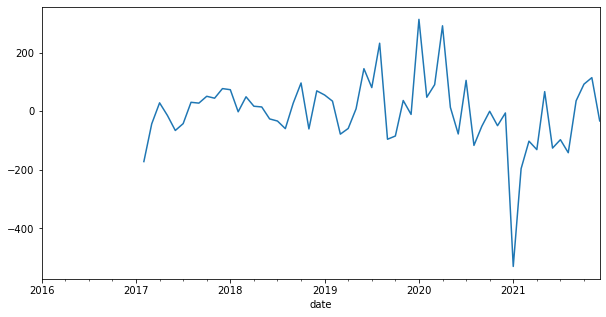

In [65]:
plt.figure(figsize=(10,5))
quarterly_mean_sales['price'].plot()
plt.show()

In [66]:
from pandas.plotting import lag_plot

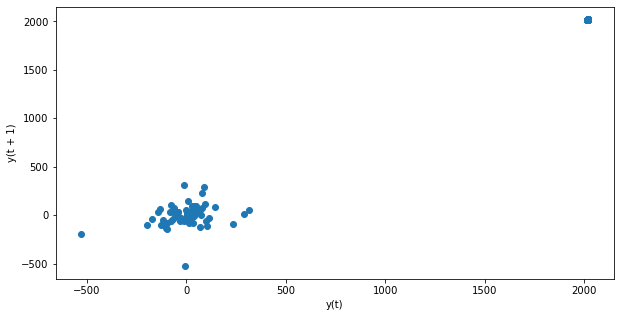

In [67]:
plt.figure(figsize=(10,5))
lag_plot(quarterly_mean_sales)
plt.show()

In [68]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [69]:
import statsmodels.api as sm

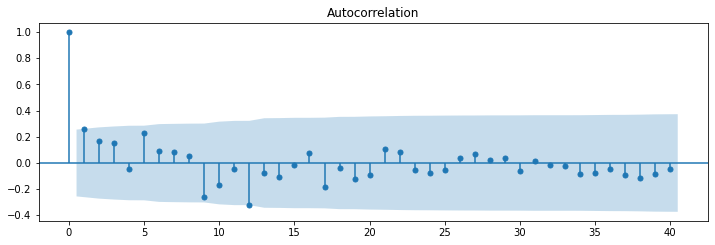

In [70]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(quarterly_mean_sales['price'].iloc[13:],lags=40,ax=ax1)
#ax2 = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(quarterly_mean_sales['price'].iloc[13:],lags=40,ax=ax2)

# 5. Model Building

In [71]:
import numpy as np

In [72]:
quarterly_mean_sales['t']=np.arange(1,73)
quarterly_mean_sales['t_sq']=quarterly_mean_sales['t']*quarterly_mean_sales['t']
quarterly_mean_sales['log_gold']=np.log(quarterly_mean_sales['price'])

In [73]:
Train=quarterly_mean_sales[0:50]
Test=quarterly_mean_sales[51:70]

In [74]:
Test.set_index(np.arange(1,20),inplace=True)

# 1. Linear Model

In [75]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('price~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_linear))**2))
rmse_linear

220.4639404317754

# 2. Exponential

In [76]:
Exp = smf.ols('log_gold~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['price'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

236.81881386165952

# 3.Quadratic 

In [77]:
Quad = smf.ols('price~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_Quad))**2))
rmse_Quad

211.82047548450188

In [78]:
Gold_Price = quarterly_mean_sales.iloc[:,0:1]
Gold_Price

,price
date,
2016-01-31,NaN
2016-02-29,NaN
2016-03-31,NaN
2016-04-30,NaN
2016-05-31,NaN
...,...
2021-08-31,-141.935484
2021-09-30,35.365591
2021-10-31,92.182796


# 4.  Additive seasonality 

In [79]:
add_sea = smf.ols('price~Month_of_Year',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Month_of_Year']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_add_sea))**2))
rmse_add_sea

174.75388141949597

# 5. Additive Seasonality With Quadratic Trend

In [80]:
add_sea_Quad = smf.ols('price~t+t_sq+Month_of_Year',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Month_of_Year','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

209.57816700211498

# 6.  Multiplicative Seasonality

In [81]:
Mul_sea = smf.ols('log_gold~Month_of_Year',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['price'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

188.17870978809532

# 7. Multiplicative With Additive Seasonality 

In [82]:
Mul_Add_sea = smf.ols('log_gold~t+Month_of_Year',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['price'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

240.6005109167364

In [83]:
import warnings

In [84]:
warnings.filterwarnings("ignore")

In [85]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
#from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
#from statsmodels.tsa.holtwinters import ExponentialSmoothing 

# 8. ARIMA Model

In [86]:
from statsmodels.tsa.arima_model import ARIMA

In [87]:
model=ARIMA(Gold_Price['price'].dropna(),order=(1,1,1))
model_fit=model.fit()

In [88]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.price   No. Observations:                   58
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -359.760
Method:                       css-mle   S.D. of innovations            115.984
Date:                Tue, 24 May 2022   AIC                            727.521
Time:                        19:50:57   BIC                            735.763
Sample:                    03-31-2017   HQIC                           730.731
                         - 12-31-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.7853      1.204     -0.652      0.514      -3.145       1.574
ar.L1.D.price     0.2759      0.131      2.106      0.035       0.019       0.533
ma.L1.D.price    -1.0000      0.073    -13.615      0.000      -1.144      -0.856
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.6248           +0.0000j            3.6248            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='date'>

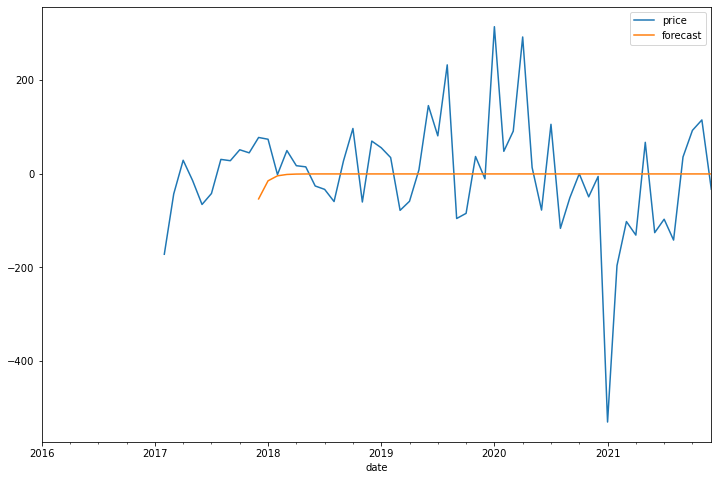

In [89]:
Gold_Price['forecast']=model_fit.predict(start=10,end=73,dynamic=True)
Gold_Price[['price','forecast']].plot(figsize=(12,8))

In [90]:
import statsmodels.api as sm

In [91]:
model=sm.tsa.statespace.SARIMAX(Gold_Price['price'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

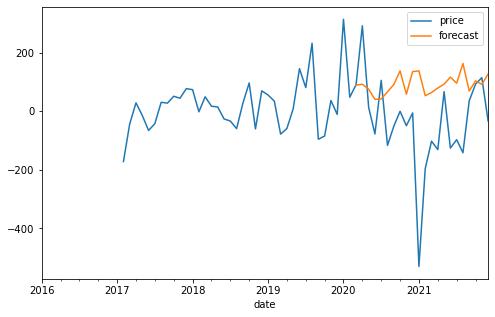

In [92]:
Gold_Price['forecast']=results.predict(start=50,end=73,dynamic=True)
Gold_Price[['price','forecast']].plot(figsize=(8,5))
plt.show()

In [93]:
Gold_Price.forecast

date
2016-01-31           NaN
2016-02-29           NaN
2016-03-31           NaN
2016-04-30           NaN
2016-05-31           NaN
                 ...    
2021-08-31    162.710971
2021-09-30     68.703538
2021-10-31    103.297845
2021-11-30     91.541086
2021-12-31    126.646628
Freq: M, Name: forecast, Length: 72, dtype: float64

In [94]:
Gold_Price4 = Gold_Price.iloc[:,0:1].dropna()
Gold_Price4

,price
date,
2017-02-28,-172.175830
2017-03-31,-43.372557
2017-04-30,28.386022
2017-05-31,-14.837634
2017-06-30,-65.995699
2017-07-31,-42.584946
2017-08-31,30.225806
2017-09-30,27.425806
2017-10-31,50.767742


In [95]:
# separating a validation dataset
split_point = len(Gold_Price4) - 30
dataset, validation = Gold_Price4[0:split_point], Gold_Price4[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 29, Validation 30


In [96]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [97]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse_wf = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse_wf)

>Predicted=49.037, Expected=16.777
>Predicted=16.777, Expected=14.319
>Predicted=14.319, Expected=-26.519
>Predicted=-26.519, Expected=-33.739
>Predicted=-33.739, Expected=-59.710
>Predicted=-59.710, Expected=27.082
>Predicted=27.082, Expected=96.209
>Predicted=96.209, Expected=-60.709
>Predicted=-60.709, Expected=69.322
>Predicted=69.322, Expected=55.129
>Predicted=55.129, Expected=34.159
>Predicted=34.159, Expected=-78.514
>Predicted=-78.514, Expected=-59.129
>Predicted=-59.129, Expected=8.000
>Predicted=8.000, Expected=145.033
RMSE: 79.280


In [98]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse_gs = sqrt(mean_squared_error(test, predictions))
    return rmse_gs

In [99]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse_gs = evaluate_arima_model(train, order)
                    if rmse_gs < best_score:
                        best_score, best_cfg = rmse_gs, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse_gs))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [100]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
#evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=63.642
ARIMA(0, 0, 1) RMSE=73.535
ARIMA(0, 0, 2) RMSE=74.221
ARIMA(0, 0, 3) RMSE=77.813
ARIMA(0, 0, 4) RMSE=79.973
ARIMA(0, 1, 0) RMSE=81.207
ARIMA(0, 1, 1) RMSE=83.204
ARIMA(0, 1, 2) RMSE=83.559
ARIMA(0, 1, 3) RMSE=102.285
ARIMA(0, 1, 4) RMSE=106.872
ARIMA(0, 2, 0) RMSE=121.765
ARIMA(0, 2, 1) RMSE=88.285
ARIMA(0, 2, 2) RMSE=90.471
ARIMA(0, 2, 3) RMSE=95.470
ARIMA(0, 2, 4) RMSE=105.163
ARIMA(1, 0, 0) RMSE=69.677
ARIMA(1, 1, 0) RMSE=84.193
ARIMA(1, 2, 0) RMSE=110.486
ARIMA(2, 0, 0) RMSE=72.504
ARIMA(2, 1, 0) RMSE=91.533
ARIMA(2, 2, 0) RMSE=113.568
ARIMA(3, 0, 0) RMSE=79.289
ARIMA(3, 1, 0) RMSE=87.197
ARIMA(3, 2, 0) RMSE=105.204
ARIMA(4, 0, 0) RMSE=78.038
ARIMA(4, 1, 0) RMSE=90.540
ARIMA(4, 2, 0) RMSE=100.883
Best ARIMA(0, 0, 0) RMSE=63.642


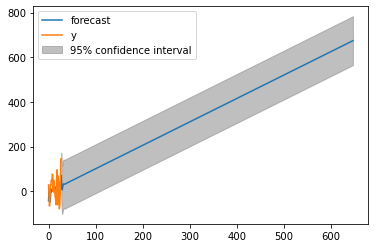

In [101]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

# fit model
model = ARIMA(X, order=(3,1,1))
model_fit = model.fit()
forecast=model_fit.forecast(steps=30)[0]
model_fit.plot_predict(1, 648)
plt.show()

In [102]:
forecast

array([70.50076413, 23.25983254,  6.73205544, 17.34820843, 28.71619758,
       33.25866217, 32.87075767, 31.92885039, 32.23427609, 33.49664735,
       34.92000311, 36.12497426, 37.14357291, 38.12181277, 39.13739329,
       40.18902827, 41.25012576, 42.30499484, 43.3529458 , 44.39876942,
       45.44559943, 46.49374582, 47.54235636, 48.59081139, 49.63901806,
       50.68712575, 51.73525586, 52.78343243, 53.83162971, 54.87982415])

In [103]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse_forecast = sqrt(mean_squared_error(val[1], forecast))
rmse_forecast

165.48420983492753

# 6. Model Evaluation

In [104]:
new = pd.read_csv("Gold_data.csv")

In [105]:
new

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [106]:
new['date']= pd.to_datetime(new['date'])
new=new.set_index(['date'])

In [107]:
# fit model
Gold_Price1=new.dropna()
#df= newdf.set_index('observation_date').dropna()

# prepare data
X = Gold_Price1.values
X = X.astype('float32')

In [108]:
model = ARIMA(X, order=(3,1,1))
model_fit = model.fit()

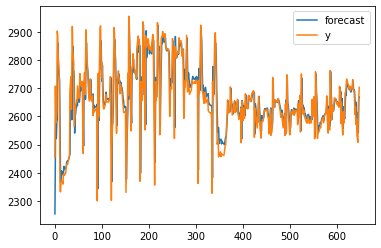

In [109]:
forecast=model_fit.forecast(steps=30)[0]
model_fit.plot_predict(1, 648)
plt.show()

In [110]:
forecast

array([4346.68350765, 4346.70531699, 4346.57701928, 4346.66831345,
       4346.96658864, 4347.40562899, 4347.94518116, 4348.55966296,
       4349.23010377, 4349.94216309, 4350.68514787, 4351.45111863,
       4352.23417652, 4353.02993645, 4353.83513854, 4354.64735953,
       4355.46479805, 4356.28611508, 4357.11031522, 4357.93665854,
       4358.76459501, 4359.59371577, 4360.42371686, 4361.25437237,
       4362.08551434, 4362.91701792, 4363.74879032, 4364.58076253,
       4365.41288328, 4366.24511445])

In [111]:
pd.DataFrame(forecast)

,0
0,4346.683508
1,4346.705317
2,4346.577019
3,4346.668313
4,4346.966589
5,4347.405629
6,4347.945181
7,4348.559663
8,4349.230104
9,4349.942163


In [112]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 2181
Model:                 ARIMA(3, 1, 1)   Log Likelihood              -13310.820
Method:                       css-mle   S.D. of innovations            108.192
Date:                Tue, 24 May 2022   AIC                          26633.639
Time:                        19:51:56   BIC                          26667.765
Sample:                             1   HQIC                         26646.115
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8326      0.313      2.658      0.008       0.219       1.447
ar.L1.D.y      0.8704      0.022     39.497      0.000       0.827       0.914
ar.L2.D.y     -0.1507      0.028     -5.346      0.000      -0.206      -0.095
ar.L3.D.y      0.0419      0.022      1.918      0.055      -0.001       0.085
ma.L1.D.y     -0.9682      0.005   -189.406      0.000      -0.978      -0.958
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3452           -0.0000j            1.3452           -0.0000
AR.2            1.1275           -4.0601j            4.2138           -0.2069
AR.3            1.1275           +4.0601j            4.2138            0.2069
MA.1            1.0329           +0.0000j            1.0329            0.0000
-----------------------------------------------------------------------------
"""

In [113]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_wf","rmse_forecast","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea "]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_wf,rmse_forecast,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea ])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,rmse_wf,79.280003
4,rmse_forecast,165.484210
5,rmse_add_sea,174.753881
7,rmse_Mult_sea,188.178710
6,rmse_add_sea_quad,209.578167
2,rmse_Quad,211.820475
0,rmse_linear,220.463940
1,rmse_Exp,236.818814
8,rmse_Mult_add_sea,240.600511


# Algorithm Vs RMSE

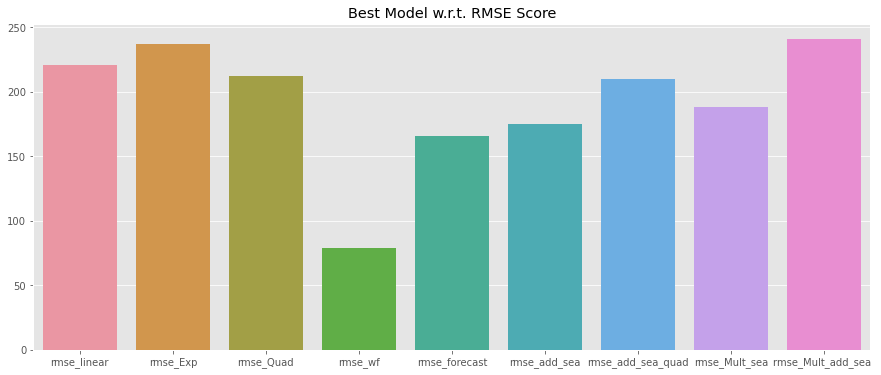

In [138]:
plt.style.use('ggplot') 
plt.figure(figsize=(15,6))
sns.barplot(x='MODEL',y='RMSE_Values',data=data)
plt.title("Best Model w.r.t. RMSE Score") 
plt.show()

# Conclusion: From all the above models ARIMA is the best model as low RMSE value

# 7. Model Deployment

In [114]:
from pickle import dump

In [115]:
dump(rmse_wf,open('rmse_wf.pkl', 'wb'))

In [116]:
from pickle import load

In [117]:
rmse_wf_pickle = load(open('rmse_wf.pkl', 'rb'))

# THE END